# Customer Behaviour Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('synthetic_bangalore_orders.csv')
data.head(10)

,order_id,customer_id,restaurant_id,restaurant_area,cuisine,dish,quantity,price_per_item,total_price,order_timestamp,delivery_time_minutes,customer_rating
0,1,1319,1,BTM Layout,North Indian,Dal Tadka,3,353,1059,2023-10-19 14:33:00,22,4
1,2,6722,85,Indiranagar,Bakery,Chocolate Cake,2,393,786,2023-10-24 20:00:00,22,5
2,3,1969,70,Whitefield,Chinese,Veg Noodles,3,270,810,2023-04-17 09:21:00,13,5
3,4,6319,239,Indiranagar,Italian,Margherita Pizza,3,330,990,2023-06-27 05:03:00,28,5
4,5,3059,159,Indiranagar,South Indian,Idli Vada,1,179,179,2023-10-13 14:34:00,37,5
5,6,5970,71,HSR Layout,Bakery,Chocolate Cake,2,323,646,2023-04-24 22:42:00,38,5
6,7,1350,234,Koramangala,South Indian,Idli Vada,3,376,1128,2023-12-16 08:48:00,20,3
7,8,2432,171,Koramangala,Biryani,Veg Biryani,1,268,268,2023-12-04 14:47:00,29,5
8,9,4588,164,MG Road,Biryani,Mutton Biryani,3,242,726,2023-05-02 07:11:00,29,3
9,10,1818,170,Whitefield,Bakery,Croissant,2,355,710,2023-09-08 05:19:00,24,5


In [3]:
data.columns

Index(['order_id', 'customer_id', 'restaurant_id', 'restaurant_area',
       'cuisine', 'dish', 'quantity', 'price_per_item', 'total_price',
       'order_timestamp', 'delivery_time_minutes', 'customer_rating'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               50000 non-null  int64 
 1   customer_id            50000 non-null  int64 
 2   restaurant_id          50000 non-null  int64 
 3   restaurant_area        50000 non-null  object
 4   cuisine                50000 non-null  object
 5   dish                   50000 non-null  object
 6   quantity               50000 non-null  int64 
 7   price_per_item         50000 non-null  int64 
 8   total_price            50000 non-null  int64 
 9   order_timestamp        50000 non-null  object
 10  delivery_time_minutes  50000 non-null  int64 
 11  customer_rating        50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [5]:
data.describe()

,order_id,customer_id,restaurant_id,quantity,price_per_item,total_price,delivery_time_minutes,customer_rating
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,3996.020480,149.848100,2.002800,299.613760,600.152280,32.050680,3.843480
std,14433.901067,2310.130894,87.007619,0.817487,115.605184,350.041734,9.858423,1.155287
min,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,10.000000,1.000000
25%,12500.750000,1987.000000,74.000000,1.000000,200.000000,327.000000,25.000000,3.000000
50%,25000.500000,3990.000000,150.000000,2.000000,300.000000,492.000000,32.000000,4.000000
75%,37500.250000,5993.000000,225.000000,3.000000,400.000000,840.000000,39.000000,5.000000
max,50000.000000,8000.000000,300.000000,3.000000,499.000000,1497.000000,70.000000,5.000000


In [6]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_id            0
restaurant_area          0
cuisine                  0
dish                     0
quantity                 0
price_per_item           0
total_price              0
order_timestamp          0
delivery_time_minutes    0
customer_rating          0
dtype: int64

“The order-level dataset had no missing values and passed all logical validation checks including price, quantity, delivery time, and rating ranges. No data removal was required before analysis.”

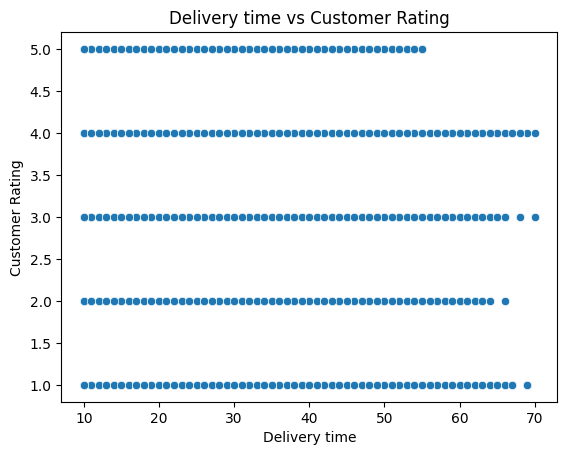

In [7]:
sns.scatterplot(x=data["delivery_time_minutes"], y=data['customer_rating'])
plt.title("Delivery time vs Customer Rating")
plt.xlabel("Delivery time")
plt.ylabel("Customer Rating")
plt.show()

This plot is statistically correct but not insightfull and understandable easliy so we will try grouping the delivery time in ranges and then plot the graph for better understanding

In [8]:
bins=[0, 20, 30, 40, 50, 100]
labels= ['<=20min', '21-30min', '31-40min', '41-50min', '50+ min']

data['delivery_buckets']= pd.cut(
    data['delivery_time_minutes'],
    bins=bins,
    labels=labels
) #Feature Engineering

In [9]:
bucket_summary = (
    data.groupby('delivery_buckets')['customer_rating']
    .mean()
    .reset_index()
)

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_17316\3614662354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('delivery_buckets')['customer_rating']


In [10]:
bucket_summary

,delivery_buckets,customer_rating
0,<=20min,3.863051
1,21-30min,3.856691
2,31-40min,3.851531
3,41-50min,3.849951
4,50+ min,3.517538


In [11]:
data.head()

,order_id,customer_id,restaurant_id,restaurant_area,cuisine,dish,quantity,price_per_item,total_price,order_timestamp,delivery_time_minutes,customer_rating,delivery_buckets
0,1,1319,1,BTM Layout,North Indian,Dal Tadka,3,353,1059,2023-10-19 14:33:00,22,4,21-30min
1,2,6722,85,Indiranagar,Bakery,Chocolate Cake,2,393,786,2023-10-24 20:00:00,22,5,21-30min
2,3,1969,70,Whitefield,Chinese,Veg Noodles,3,270,810,2023-04-17 09:21:00,13,5,<=20min
3,4,6319,239,Indiranagar,Italian,Margherita Pizza,3,330,990,2023-06-27 05:03:00,28,5,21-30min
4,5,3059,159,Indiranagar,South Indian,Idli Vada,1,179,179,2023-10-13 14:34:00,37,5,31-40min


<Axes: xlabel='delivery_buckets', ylabel='customer_rating'>

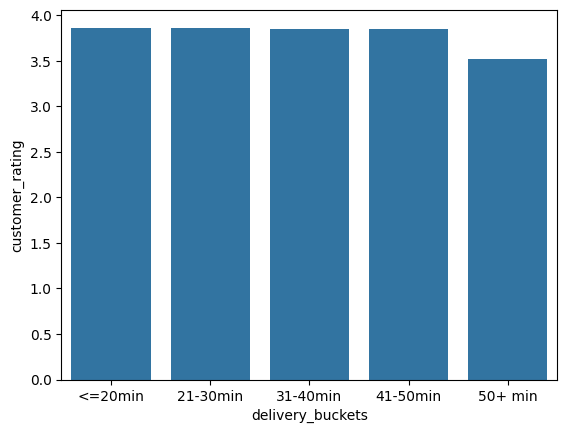

In [12]:
sns.barplot(
    x='delivery_buckets',
    y='customer_rating',
    data= bucket_summary
)

From the above graph it is seen that Delivery time doesn't affect much on the ratings and customer satisfaction 

In [13]:
rating_counts = (
    data
    .groupby(['delivery_buckets', 'customer_rating'])
    .size()
    .reset_index(name='count')
)


C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_17316\3273423007.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['delivery_buckets', 'customer_rating'])


In [14]:
rating_counts

,delivery_buckets,customer_rating,count
0,<=20min,1,310
1,<=20min,2,603
2,<=20min,3,904
3,<=20min,4,2208
4,<=20min,5,2189
5,21-30min,1,775
6,21-30min,2,1543
7,21-30min,3,2423
8,21-30min,4,5503
9,21-30min,5,5568


In [15]:
rating_counts['percentage']= (
    rating_counts
    .groupby('delivery_buckets')['count']
    .transform(lambda x: x/x.sum() * 100)
).round(2)
rating_counts

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_17316\2538930732.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('delivery_buckets')['count']


,delivery_buckets,customer_rating,count,percentage
0,<=20min,1,310,4.99
1,<=20min,2,603,9.70
2,<=20min,3,904,14.55
3,<=20min,4,2208,35.53
4,<=20min,5,2189,35.23
5,21-30min,1,775,4.90
6,21-30min,2,1543,9.76
7,21-30min,3,2423,15.32
8,21-30min,4,5503,34.80
9,21-30min,5,5568,35.21


In [16]:
rating_pivot = rating_counts.pivot(
    index='delivery_buckets',
    columns= 'customer_rating',
    values= 'percentage'
).fillna(0)
rating_pivot

customer_rating,1,2,3,4,5
delivery_buckets,,,,,
<=20min,4.99,9.70,14.55,35.53,35.23
21-30min,4.90,9.76,15.32,34.80,35.21
31-40min,5.06,9.95,14.70,35.37,34.92
41-50min,5.18,9.89,15.03,34.57,35.34
50+ min,9.17,12.00,20.43,34.71,23.69


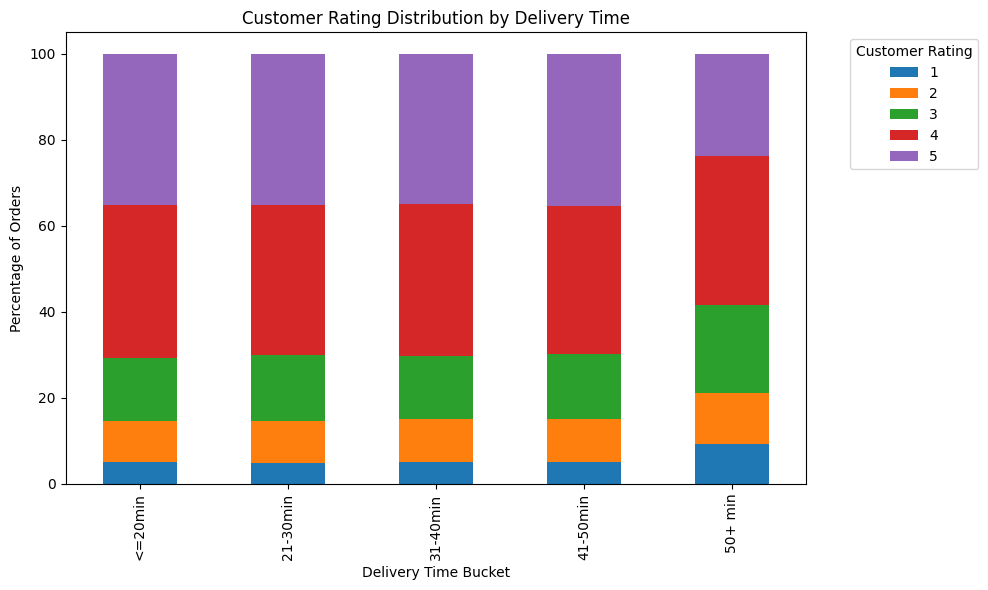

In [17]:
rating_pivot.plot(
    kind='bar',
    stacked= True,
    figsize=(10,6)
)

plt.title("Customer Rating Distribution by Delivery Time")
plt.xlabel("Delivery Time Bucket")
plt.ylabel("Percentage of Orders")
plt.legend(title="Customer Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insights from above plot
- Overall rating distribution remains fairly stable across delivery time ranges.
- However Faster deliveries shpw a slightly higher share of 5-star ratings
- While longer delivery time shows a slight increase in low ratings.
- This indicates delivery speed affects customer experience quality rather than average satisfaction upto some extent.

In [18]:
spend_bins = [0, 300, 600, 900, 2000]
spend_labels = ['Low', 'Medium', 'High', 'Premium']

data['spend_bucket'] = pd.cut(
    data["total_price"],
    bins=spend_bins,
    labels=spend_labels
)

In [19]:
data['spend_bucket'].value_counts()


spend_bucket
Medium     18566
High       10557
Low        10529
Premium    10348
Name: count, dtype: int64

In [20]:
spend_rating_counts = (
    data
    .groupby(['spend_bucket', 'customer_rating'])
    .size()
    .reset_index(name='count')
)

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_17316\343181356.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['spend_bucket', 'customer_rating'])


In [21]:
spend_rating_counts

,spend_bucket,customer_rating,count
0,Low,1,599
1,Low,2,1031
2,Low,3,1604
3,Low,4,3707
4,Low,5,3588
5,Medium,1,928
6,Medium,2,1818
7,Medium,3,2795
8,Medium,4,6406
9,Medium,5,6619


In [22]:
spend_rating_counts['percentage']=(
    spend_rating_counts
    .groupby('spend_bucket')['count']
    .transform(lambda x: x/x.sum()*100)
).round(2)

C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_17316\754005885.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('spend_bucket')['count']


In [23]:
spend_rating_counts.groupby('spend_bucket')['percentage'].sum()


C:\Users\AVADHOOT\AppData\Local\Temp\ipykernel_17316\2197045569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spend_rating_counts.groupby('spend_bucket')['percentage'].sum()


spend_bucket
Low        100.00
Medium      99.99
High       100.00
Premium    100.00
Name: percentage, dtype: float64

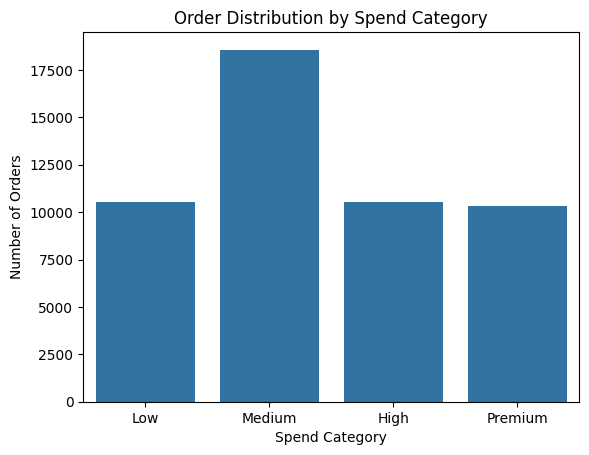

In [24]:
sns.countplot(x='spend_bucket', data=data)
plt.title("Order Distribution by Spend Category")
plt.xlabel("Spend Category")
plt.ylabel("Number of Orders")
plt.show()

In [25]:
cuisines_df = pd.read_csv("cuisines_df.csv")
cuisines_df.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),has_dish_info,cost_category,weighted_score,clean_name,cuisine_list
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,North Indian
1,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,Mughlai
2,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,1,Medium,27.282025,Jalsa,Chinese
3,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,1,Medium,27.344942,Spice Elephant,Chinese
4,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,1,Medium,27.344942,Spice Elephant,North Indian


In [26]:
cuisines_base = cuisines_df.copy()

In [27]:
cuisines_base.describe()

,online_order,book_table,rate,votes,approx_cost(for two people),has_dish_info,weighted_score
count,126864.000000,126864.000000,126864.000000,126864.000000,126864.000000,126864.000000,126864.000000
mean,0.615770,0.169473,3.725969,379.324544,614.928128,0.532665,15.245029
std,0.486415,0.375170,0.423257,963.832151,452.332930,0.498934,10.043642
min,0.000000,0.000000,1.800000,0.000000,40.000000,0.000000,0.000000
25%,0.000000,0.000000,3.500000,10.000000,300.000000,0.000000,8.152844
50%,1.000000,0.000000,3.700000,64.000000,500.000000,1.000000,14.919380
75%,1.000000,0.000000,4.000000,297.000000,750.000000,1.000000,22.553419
max,1.000000,1.000000,4.900000,16832.000000,6000.000000,1.000000,47.682373


In [28]:
cuisines_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126864 entries, 0 to 126863
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   address                      126864 non-null  object 
 1   name                         126864 non-null  object 
 2   online_order                 126864 non-null  int64  
 3   book_table                   126864 non-null  int64  
 4   rate                         126864 non-null  float64
 5   votes                        126864 non-null  int64  
 6   location                     126864 non-null  object 
 7   rest_type                    126864 non-null  object 
 8   dish_liked                   126864 non-null  object 
 9   cuisines                     126864 non-null  object 
 10  approx_cost(for two people)  126864 non-null  float64
 11  menu_item                    126864 non-null  object 
 12  listed_in(type)              126864 non-null  object 
 13 

In [29]:
cuisine_dim = (
    cuisines_base[['clean_name', 'location', 'cuisine_list']]
    .drop_duplicates()
    .reset_index(drop=True)
)


In [30]:
cuisine_dim.isnull().sum()

clean_name      0
location        0
cuisine_list    0
dtype: int64

In [31]:
cuisine_dim.to_csv("cuisine_dim.csv")

**Do people order different dishes on weekdays vs weekends?**

This helps restaurants:

- Prep ingredients differently

- Plan weekday vs weekend menus

- Handle rush efficiently

In [32]:
data['order_timestamp']= pd.to_datetime(data['order_timestamp'])

In [33]:
data["day_of_week"] = data['order_timestamp'].dt.day_name()

In [34]:
data.head()

,order_id,customer_id,restaurant_id,restaurant_area,cuisine,dish,quantity,price_per_item,total_price,order_timestamp,delivery_time_minutes,customer_rating,delivery_buckets,spend_bucket,day_of_week
0,1,1319,1,BTM Layout,North Indian,Dal Tadka,3,353,1059,2023-10-19 14:33:00,22,4,21-30min,Premium,Thursday
1,2,6722,85,Indiranagar,Bakery,Chocolate Cake,2,393,786,2023-10-24 20:00:00,22,5,21-30min,High,Tuesday
2,3,1969,70,Whitefield,Chinese,Veg Noodles,3,270,810,2023-04-17 09:21:00,13,5,<=20min,High,Monday
3,4,6319,239,Indiranagar,Italian,Margherita Pizza,3,330,990,2023-06-27 05:03:00,28,5,21-30min,Premium,Tuesday
4,5,3059,159,Indiranagar,South Indian,Idli Vada,1,179,179,2023-10-13 14:34:00,37,5,31-40min,Low,Friday


In [35]:
data['day_type']= data["day_of_week"].apply(
    lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday"
)

In [36]:
data.head()

,order_id,customer_id,restaurant_id,restaurant_area,cuisine,dish,quantity,price_per_item,total_price,order_timestamp,delivery_time_minutes,customer_rating,delivery_buckets,spend_bucket,day_of_week,day_type
0,1,1319,1,BTM Layout,North Indian,Dal Tadka,3,353,1059,2023-10-19 14:33:00,22,4,21-30min,Premium,Thursday,Weekday
1,2,6722,85,Indiranagar,Bakery,Chocolate Cake,2,393,786,2023-10-24 20:00:00,22,5,21-30min,High,Tuesday,Weekday
2,3,1969,70,Whitefield,Chinese,Veg Noodles,3,270,810,2023-04-17 09:21:00,13,5,<=20min,High,Monday,Weekday
3,4,6319,239,Indiranagar,Italian,Margherita Pizza,3,330,990,2023-06-27 05:03:00,28,5,21-30min,Premium,Tuesday,Weekday
4,5,3059,159,Indiranagar,South Indian,Idli Vada,1,179,179,2023-10-13 14:34:00,37,5,31-40min,Low,Friday,Weekday


In [42]:
dish_day_summary=  (
    data
    .groupby(['dish', 'day_type'])
    .size()
    .reset_index(name='order_count')
)

In [43]:
dish_day_summary.head()

,dish,day_type,order_count
0,Blueberry Muffin,Weekday,1676
1,Blueberry Muffin,Weekend,698
2,Burger,Weekday,1448
3,Burger,Weekend,536
4,Butter Naan,Weekday,1288


In [44]:
top_weekday_dishes = (
    dish_day_summary[dish_day_summary['day_type'] == 'Weekday']
    .sort_values(by='order_count', ascending=False)
    .head(10)
)

top_weekend_dishes = (
    dish_day_summary[dish_day_summary['day_type'] == "Weekend"]
    .sort_values(by='order_count', ascending=False)
    .head(10)
)

In [45]:
top_weekday_dishes

,dish,day_type,order_count
12,Croissant,Weekday,1734
36,Sev Puri,Weekday,1732
10,Chocolate Cake,Weekday,1702
14,Dabeli,Weekday,1699
0,Blueberry Muffin,Weekday,1676
34,Pani Puri,Weekday,1671
38,Spring Roll,Weekday,1580
24,Manchurian,Weekday,1578
40,Upma,Weekday,1559
44,Veg Noodles,Weekday,1494


In [46]:
top_weekend_dishes

,dish,day_type,order_count
13,Croissant,Weekend,732
1,Blueberry Muffin,Weekend,698
11,Chocolate Cake,Weekend,692
15,Dabeli,Weekend,668
23,Idli Vada,Weekend,664
25,Manchurian,Weekend,652
45,Veg Noodles,Weekend,650
35,Pani Puri,Weekend,647
37,Sev Puri,Weekend,646
39,Spring Roll,Weekend,639


In [47]:
combined_top_dishes = pd.concat(
    [top_weekday_dishes, top_weekend_dishes]
)

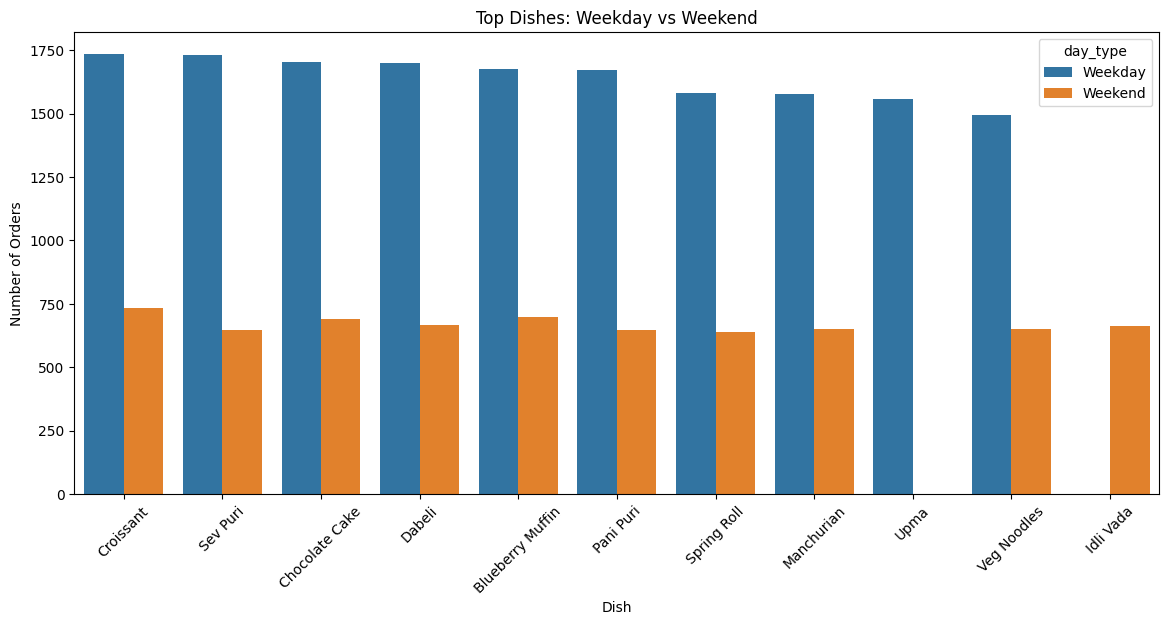

In [49]:
plt.figure(figsize= (14,6))
sns.barplot(
    data=combined_top_dishes,
    x='dish',
    y='order_count',
    hue='day_type'
)

plt.title("Top Dishes: Weekday vs Weekend")
plt.xlabel("Dish")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

Insights from above chart:
- Customer dish preferences remain largely consistent across weekdays and weekends.

- Bakery items and popular street food perform well throughout the week.

- Weekday orders lean slightly towards quick and convenient items.

- Weekend orders include more comfort and traditional dishes.

- Restaurants can rely on a stable core menu instead of frequent menu changes.

**At what time of the day do maximum orders happen?**

This helps:

- Restaurants plan staff

- Delivery partners plan availability

- Platforms plan offers & notifications

In [50]:
data['order_timestamp'] = pd.to_datetime(data['order_timestamp'])


In [51]:
data['order_hour'] = data['order_timestamp'].dt.hour

In [52]:
data.head()

,order_id,customer_id,restaurant_id,restaurant_area,cuisine,dish,quantity,price_per_item,total_price,order_timestamp,delivery_time_minutes,customer_rating,delivery_buckets,spend_bucket,day_of_week,day_type,order_hour
0,1,1319,1,BTM Layout,North Indian,Dal Tadka,3,353,1059,2023-10-19 14:33:00,22,4,21-30min,Premium,Thursday,Weekday,14
1,2,6722,85,Indiranagar,Bakery,Chocolate Cake,2,393,786,2023-10-24 20:00:00,22,5,21-30min,High,Tuesday,Weekday,20
2,3,1969,70,Whitefield,Chinese,Veg Noodles,3,270,810,2023-04-17 09:21:00,13,5,<=20min,High,Monday,Weekday,9
3,4,6319,239,Indiranagar,Italian,Margherita Pizza,3,330,990,2023-06-27 05:03:00,28,5,21-30min,Premium,Tuesday,Weekday,5
4,5,3059,159,Indiranagar,South Indian,Idli Vada,1,179,179,2023-10-13 14:34:00,37,5,31-40min,Low,Friday,Weekday,14


In [61]:
def time_bucket (hour):
    if 6 <= hour <= 11:
        return "Breakfast"
    elif 12 <= hour <= 15:
        return "Lunch"
    elif 16 <= hour <= 7:
        return "Eveming"
    elif 7 <= hour <= 23:
        return "Dinner"
    else:
        return 'Late Night'

data['time_of_day'] = data['order_hour'].apply(time_bucket) 

In [62]:
time_demand = (
    data
    .groupby('time_of_day')
    .size()
    .reset_index(name="order_count")

)
time_demand

,time_of_day,order_count
0,Breakfast,12617
1,Dinner,16653
2,Late Night,12495
3,Lunch,8235


In [63]:
data.head()

,order_id,customer_id,restaurant_id,restaurant_area,cuisine,dish,quantity,price_per_item,total_price,order_timestamp,delivery_time_minutes,customer_rating,delivery_buckets,spend_bucket,day_of_week,day_type,order_hour,time_of_day
0,1,1319,1,BTM Layout,North Indian,Dal Tadka,3,353,1059,2023-10-19 14:33:00,22,4,21-30min,Premium,Thursday,Weekday,14,Lunch
1,2,6722,85,Indiranagar,Bakery,Chocolate Cake,2,393,786,2023-10-24 20:00:00,22,5,21-30min,High,Tuesday,Weekday,20,Dinner
2,3,1969,70,Whitefield,Chinese,Veg Noodles,3,270,810,2023-04-17 09:21:00,13,5,<=20min,High,Monday,Weekday,9,Breakfast
3,4,6319,239,Indiranagar,Italian,Margherita Pizza,3,330,990,2023-06-27 05:03:00,28,5,21-30min,Premium,Tuesday,Weekday,5,Late Night
4,5,3059,159,Indiranagar,South Indian,Idli Vada,1,179,179,2023-10-13 14:34:00,37,5,31-40min,Low,Friday,Weekday,14,Lunch


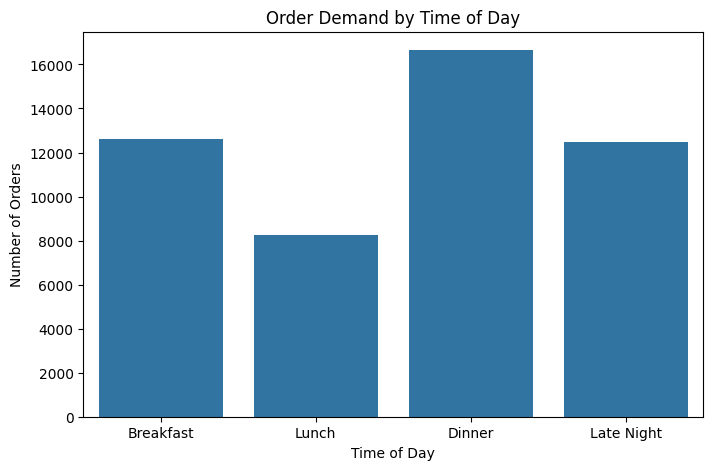

In [65]:
plt.figure(figsize=(8,5))
order = ['Breakfast', 'Lunch', 'Dinner', 'Late Night']
sns.barplot(data=time_demand, x='time_of_day', y='order_count', order=order)

plt.title("Order Demand by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Orders")
plt.show()

Insights from above chart:
- Dinner time shows the highest order volume, making it the primary demand peak.

- Breakfast demand is relatively strong, indicating preference for quick and convenient meals.

- Late-night orders exceed lunch orders, suggesting a user base inclined toward late-hour consumption.

- Lunch-time ordering is comparatively low, possibly due to workplace dining habits.

**Which restaurants consistently deliver fast, and which are slow?**

Why this matters:

- Faster delivery → better ratings → more repeat orders

- Slow delivery → customer complaints → churn

In [71]:
restaurant_delivery = (
    data
    .groupby('restaurant_id')
    .agg(
        avg_delivery_time = ('delivery_time_minutes', 'mean'),
        median_delivery_time = ('delivery_time_minutes', 'median'),
        order_count= ('order_id', 'count')
    )
    .reset_index()
)

In [72]:
restaurant_delivery = restaurant_delivery[
    restaurant_delivery['order_count'] >= 30
]


In [73]:
restaurant_delivery.head()

,restaurant_id,avg_delivery_time,median_delivery_time,order_count
0,1,31.608696,32.0,161
1,2,32.614130,33.0,184
2,3,33.426966,33.5,178
3,4,31.741758,31.0,182
4,5,32.761006,33.0,159


In [74]:
fast_restaurants = restaurant_delivery.sort_values(
    by='median_delivery_time'
).head(10)

slow_restaurants = restaurant_delivery.sort_values(
    by='median_delivery_time',
    ascending=False
).head(10)

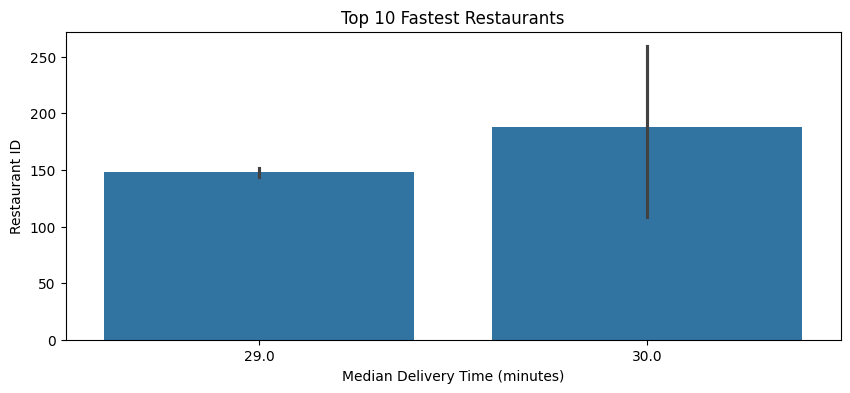

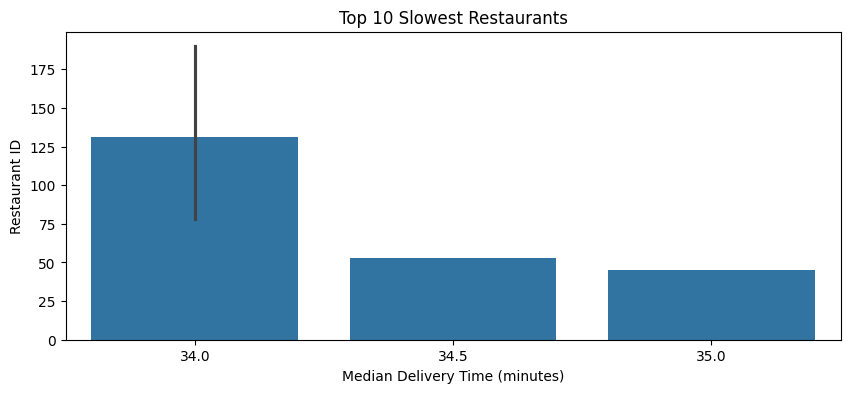

In [75]:
plt.figure(figsize=(10,4))
sns.barplot(
    data=fast_restaurants,
    x='median_delivery_time',
    y='restaurant_id'
)
plt.title("Top 10 Fastest Restaurants")
plt.xlabel("Median Delivery Time (minutes)")
plt.ylabel("Restaurant ID")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(
    data=slow_restaurants,
    x='median_delivery_time',
    y='restaurant_id'
)
plt.title("Top 10 Slowest Restaurants")
plt.xlabel("Median Delivery Time (minutes)")
plt.ylabel("Restaurant ID")
plt.show()
